## Import dos Modelos e Avaliação dos resultados

In [ ]:
# Importação das bibliotecas necessárias para manipulação de dados, visualização e integração com o Google Drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import display

In [ ]:
# Monta o Google Drive para acessar os arquivos necessários
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define o caminho para os arquivos de métricas salvos no Google Drive
file_path = '/content/drive/My Drive/autoeth-intrusion-dataset/models/'

In [ ]:
# Carrega o arquivo CSV contendo as métricas do modelo treinado e exibe os dados
loaded_metrics_df = pd.read_csv(f"{file_path}article_model_metrics.csv")
display(loaded_metrics_df)

,fold,accuracy,precision,recall,f1-score,roc_auc
0,1,0.988092,0.966867,0.995200,0.980829,0.990079
1,2,0.992538,0.986230,0.989436,0.987830,0.991671
2,3,0.995119,0.992226,0.991823,0.992024,0.994198
3,4,0.994948,0.995192,0.988268,0.991718,0.993081
4,5,0.986522,0.963369,0.993753,0.978325,0.988543


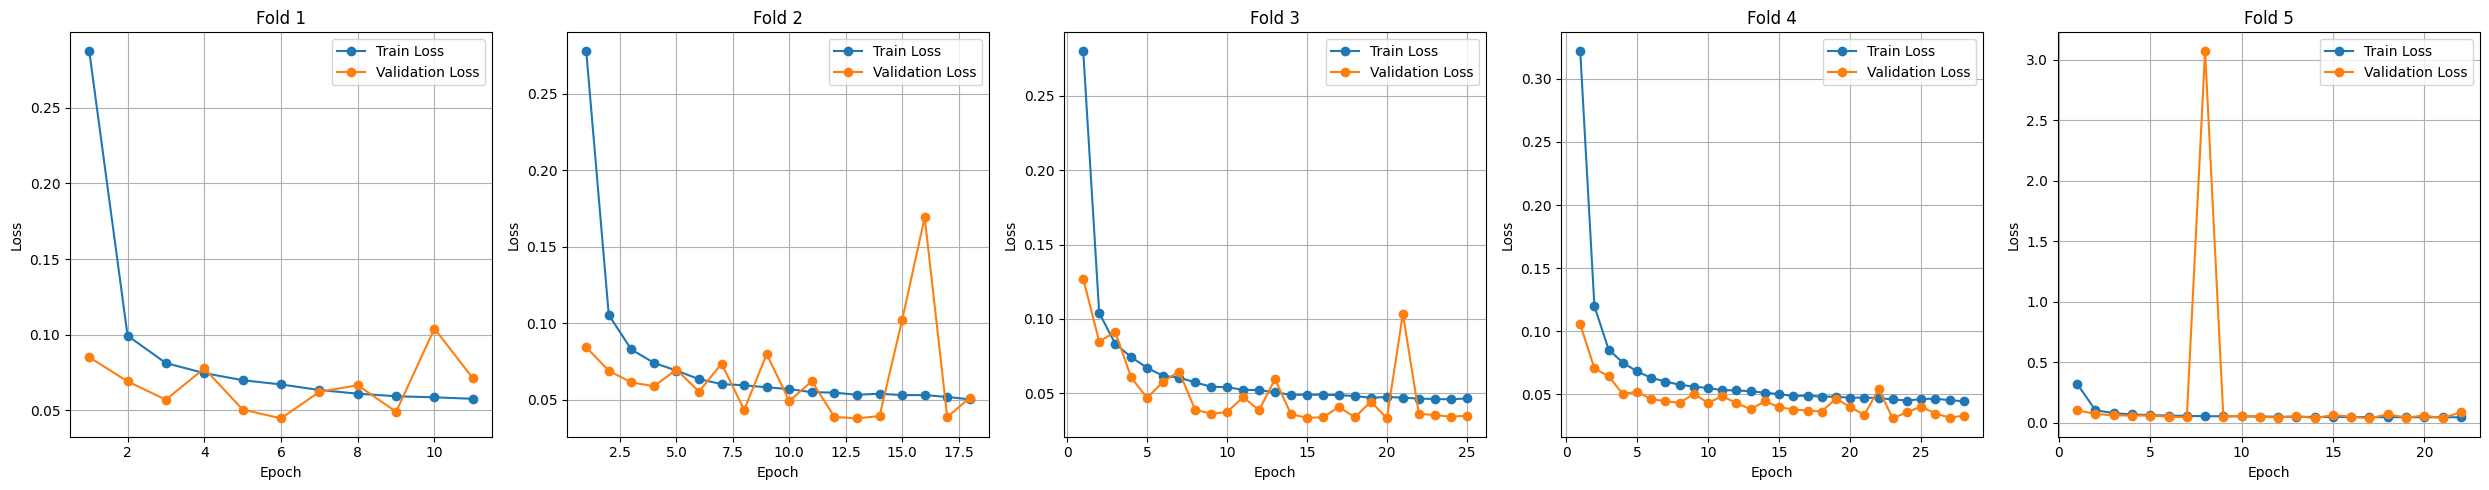

In [ ]:
# Importação adicional para visualização de gráficos
import matplotlib.pyplot as plt

# Dados de treinamento e validação extraídos dos logs do treinamento para cada fold
folds = {
    1: {
        'train_loss': [0.2877, 0.0994, 0.0813, 0.0747, 0.0700, 0.0672, 0.0635, 0.0611, 0.0594, 0.0587, 0.0577],
        'val_loss':   [0.0852, 0.0692, 0.0571, 0.0778, 0.0506, 0.0448, 0.0623, 0.0667, 0.0491, 0.1041, 0.0713]
    },
    2: {
        'train_loss': [0.2781, 0.1054, 0.0828, 0.0741, 0.0690, 0.0634, 0.0602, 0.0594, 0.0581, 0.0569, 0.0549, 0.0546, 0.0532, 0.0539, 0.0530, 0.0530, 0.0518, 0.0502],
        'val_loss':   [0.0843, 0.0689, 0.0613, 0.0588, 0.0696, 0.0553, 0.0736, 0.0433, 0.0798, 0.0491, 0.0621, 0.0387, 0.0378, 0.0393, 0.1020, 0.1692, 0.0386, 0.0513]
    },
    3: {
        'train_loss': [0.2804, 0.1041, 0.0833, 0.0743, 0.0671, 0.0617, 0.0605, 0.0573, 0.0544, 0.0540, 0.0523, 0.0521, 0.0506, 0.0489, 0.0490, 0.0490, 0.0487, 0.0481, 0.0469, 0.0475, 0.0470, 0.0464, 0.0461, 0.0459, 0.0465],
        'val_loss':   [0.1271, 0.0847, 0.0913, 0.0606, 0.0468, 0.0578, 0.0646, 0.0389, 0.0362, 0.0373, 0.0474, 0.0386, 0.0594, 0.0359, 0.0335, 0.0338, 0.0408, 0.0338, 0.0444, 0.0331, 0.1035, 0.0362, 0.0353, 0.0342, 0.0349]
    },
    4: {
        'train_loss': [0.3223, 0.1198, 0.0854, 0.0751, 0.0681, 0.0630, 0.0601, 0.0575, 0.0561, 0.0549, 0.0533, 0.0530, 0.0524, 0.0512, 0.0501, 0.0486, 0.0489, 0.0481, 0.0481, 0.0472, 0.0474, 0.0469, 0.0459, 0.0450, 0.0462, 0.0465, 0.0452, 0.0445],
        'val_loss':   [0.1054, 0.0705, 0.0642, 0.0502, 0.0520, 0.0461, 0.0445, 0.0432, 0.0503, 0.0431, 0.0485, 0.0429, 0.0382, 0.0444, 0.0398, 0.0379, 0.0371, 0.0363, 0.0466, 0.0399, 0.0336, 0.0540, 0.0309, 0.0358, 0.0402, 0.0347, 0.0315, 0.0330]
    },
    5: {
        'train_loss': [0.3210, 0.1036, 0.0798, 0.0688, 0.0640, 0.0594, 0.0569, 0.0547, 0.0541, 0.0532, 0.0519, 0.0503, 0.0490, 0.0492, 0.0474, 0.0477, 0.0470, 0.0462, 0.0461, 0.0459, 0.0464, 0.0453],
        'val_loss':   [0.1037, 0.0732, 0.0612, 0.0601, 0.0595, 0.0511, 0.0456, 3.0738, 0.0491, 0.0600, 0.0508, 0.0432, 0.0575, 0.0378, 0.0640, 0.0504, 0.0369, 0.0699, 0.0433, 0.0600, 0.0381, 0.0878]
    }
}

# Criação de uma figura com 5 subplots, um para cada fold, para visualizar as métricas de perda (loss)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, (fold, data) in enumerate(folds.items(), start=1):
    # Define os valores de épocas e plota as curvas de perda de treinamento e validação
    epochs = list(range(1, len(data['train_loss']) + 1))
    axes[i-1].plot(epochs, data['train_loss'], marker='o', label='Train Loss')
    axes[i-1].plot(epochs, data['val_loss'], marker='o', label='Validation Loss')
    axes[i-1].set_title(f'Fold {fold}')
    axes[i-1].set_xlabel('Epoch')
    axes[i-1].set_ylabel('Loss')
    axes[i-1].legend()
    axes[i-1].grid(True)

# Ajusta o layout para evitar sobreposição e exibe os gráficos
plt.tight_layout()
plt.show()
